# Case study on Supervised learning

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
# 1. Read the dataset to the python environment

In [101]:
df=pd.read_excel('iris.xls')

In [102]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [103]:
df.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [104]:
df.shape

(150, 5)

In [105]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [106]:
#filling the missing values

In [107]:
df.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

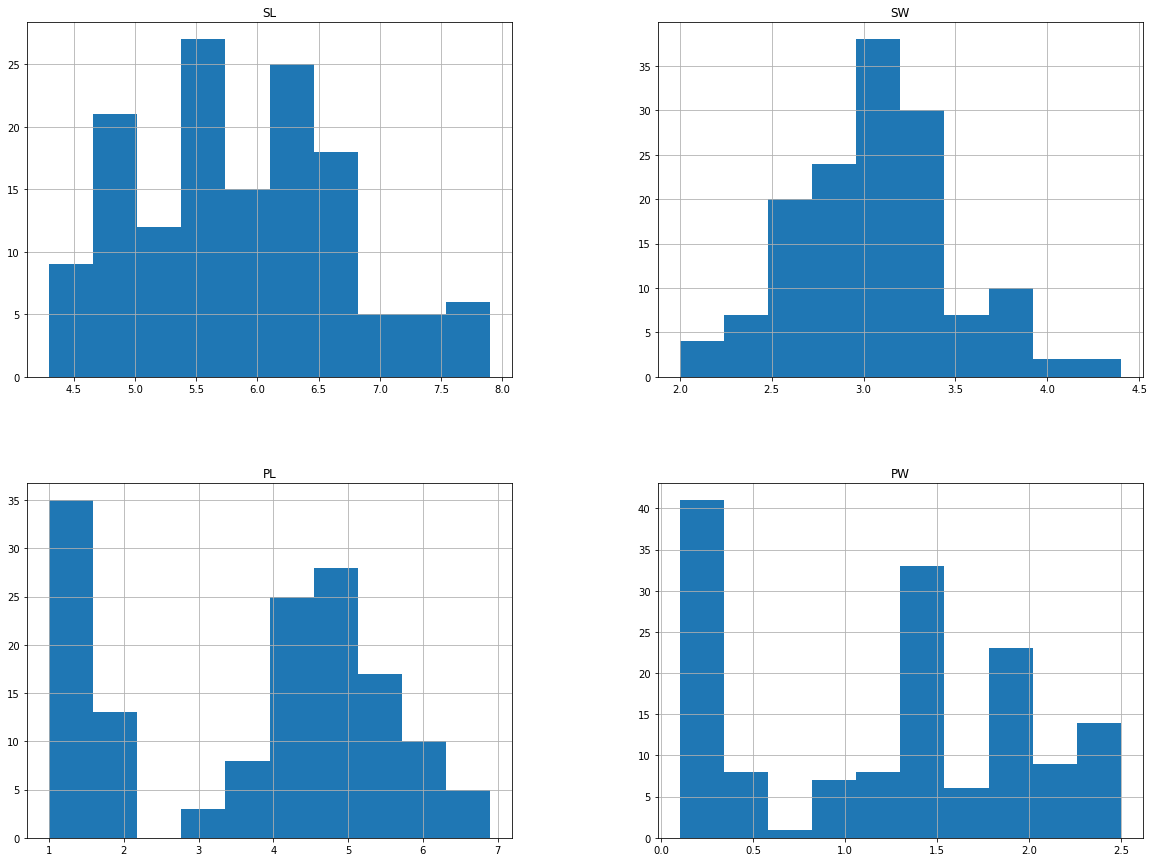

In [108]:
freqgraph = df.select_dtypes(include={'float'})
freqgraph.hist(figsize=(20,15))
plt.show()

In [109]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [110]:
for i in ['SL', 'SW', 'PL', 'PW',]:
    df[i]=df[i].fillna((df[i].mean()))

In [111]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [112]:
# 2. Do necessary pre-processing steps.

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [114]:
# Extract feature columns
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [115]:
df['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [116]:
df.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,Iris-setosa
1,4.900000,3.0,1.4,0.2,Iris-setosa
2,5.855944,3.2,1.3,0.2,Iris-setosa
3,4.600000,3.1,1.5,0.2,Iris-setosa
4,5.000000,3.6,1.4,0.2,Iris-setosa


In [117]:
# Separate the data into feature data and target data (X and y, respectively)
x=df.drop(['Classification'],axis=1)
y=pd.DataFrame(df['Classification'])

In [118]:
#Labelencoding

In [119]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
a=['Classification']
for i in np.arange(len(a)):
    y[a[i]]=label_en.fit_transform(y[a[i]])

In [120]:
x.head()

,SL,SW,PL,PW
0,5.100000,3.5,1.4,0.2
1,4.900000,3.0,1.4,0.2
2,5.855944,3.2,1.3,0.2
3,4.600000,3.1,1.5,0.2
4,5.000000,3.6,1.4,0.2


In [121]:
x.shape

(150, 4)

In [122]:
#feature engineering

In [123]:
x.columns

Index(['SL', 'SW', 'PL', 'PW'], dtype='object')

In [124]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [125]:
x_train.shape

(112, 4)

In [126]:
y_train.shape

(112, 1)

In [127]:
x_test.shape

(38, 4)

In [128]:
y_test.shape

(38, 1)

In [129]:
#standard scaling

In [130]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [131]:
#Build the model

In [132]:
# fit the model-1 on traning data and predict on the test data and measure the accuracy

In [133]:
# 1.logistic regression

In [134]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(solver='lbfgs', max_iter=1000)
logit_model.fit(x_train,y_train)
y_pred = logit_model.predict(x_test)

C:\Users\helga\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [135]:
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,precision_score,recall_score

In [136]:
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='micro'))
print('recall is:',recall_score(y_test,y_pred,average='micro'))
print('f1 is:',f1_score(y_test,y_pred,average='micro'))

Accuracy is: 0.9736842105263158
Precision is: 0.9736842105263158
recall is: 0.9736842105263158
f1 is: 0.9736842105263158


In [137]:
confusion_matrix(y_test,y_pred)

array([[15,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 12]], dtype=int64)

In [138]:
# fit the model-2 on traning data and predict on the test data and measure the accuracy

In [139]:
# 2.KNN

In [140]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric = 'minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)

C:\Users\helga\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\helga\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\helga\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\helga\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

In [141]:
acc_values

[1.0, 1.0, 1.0, 1.0, 0.9736842105263158, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Text(0, 0.5, 'accuracy')

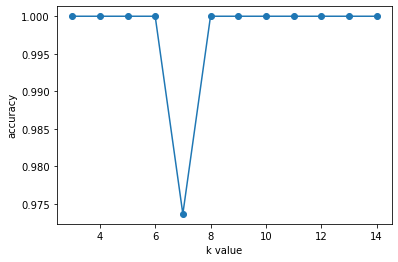

In [142]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [143]:
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='micro'))
print('recall is:',recall_score(y_test,y_pred,average='micro'))
print('f1 is:',f1_score(y_test,y_pred,average='micro'))

Accuracy is: 1.0
Precision is: 1.0
recall is: 1.0
f1 is: 1.0


In [144]:
confusion_matrix(y_test,y_pred)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [145]:
# fit the model-3 on traning data and predict on the test data and measure the accuracy

In [146]:
# 3.Decision Tree Classifier

In [147]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred = dt_model.predict(x_test)

In [148]:
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='micro'))
print('recall is:',recall_score(y_test,y_pred,average='micro'))
print('f1 is:',f1_score(y_test,y_pred,average='micro'))

Accuracy is: 1.0
Precision is: 1.0
recall is: 1.0
f1 is: 1.0


In [149]:
# random forest classifier

In [150]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

C:\Users\helga\AppData\Local\Temp/ipykernel_10372/2643617984.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


In [151]:
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='micro'))
print('recall is:',recall_score(y_test,y_pred,average='micro'))
print('f1 is:',f1_score(y_test,y_pred,average='micro'))

Accuracy is: 1.0
Precision is: 1.0
recall is: 1.0
f1 is: 1.0


random forest classifier is also a best fit model,because it has highest accuracy score and f1 score.